<ipython-input-1-881c778e5a2e>:28: RuntimeWarning: divide by zero encountered in log
  return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))
<ipython-input-1-881c778e5a2e>:28: RuntimeWarning: invalid value encountered in sqrt
  return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))
<ipython-input-1-881c778e5a2e>:28: RuntimeWarning: invalid value encountered in divide
  return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))
<ipython-input-1-881c778e5a2e>:28: RuntimeWarning: divide by zero encountered in divide
  return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))


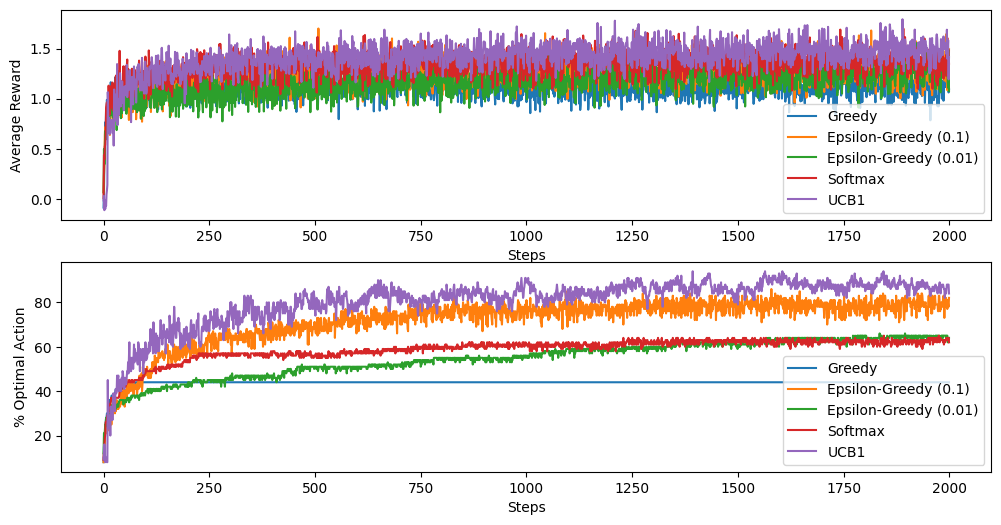

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, k):
        self.k = k
        self.q_true = np.random.randn(k)
        self.best_action = np.argmax(self.q_true)

    def step(self, action):
        return np.random.randn() + self.q_true[action]


def greedy(Q, N):
    return np.argmax(Q)

def epsilon_greedy(Q, N, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(Q))
    else:
        return np.argmax(Q)

def softmax(Q, N, temperature=0.1):
    softmax_prob = np.exp(Q / temperature) / np.sum(np.exp(Q / temperature))
    return np.random.choice(len(Q), p=softmax_prob)

def ucb(Q, N, c=2):
    return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))

def simulate_bandit(bandit, algorithm, num_steps, **kwargs):
    k = bandit.k
    Q = np.zeros(k)
    N = np.zeros(k)

    rewards = np.zeros(num_steps)
    optimal_actions = np.zeros(num_steps)

    for step in range(num_steps):
        action = algorithm(Q, N, **kwargs)
        reward = bandit.step(action)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]

        rewards[step] = reward
        optimal_actions[step] = 1 if action == bandit.best_action else 0

    return rewards, optimal_actions

def plot_results(algorithms, rewards, optimal_actions):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    for algorithm, reward in zip(algorithms, rewards):
        plt.plot(reward, label=algorithm)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()

    plt.subplot(2, 1, 2)
    for algorithm, optimal_action in zip(algorithms, optimal_actions):
        plt.plot(optimal_action * 100, label=algorithm)
    plt.xlabel('Steps')
    plt.ylabel('% Optimal Action')
    plt.legend()

    plt.show()

if __name__ == '__main__':
    num_arms = 10
    num_steps = 2000
    num_runs = 100

    algorithms = ['Greedy', 'Epsilon-Greedy (0.1)', 'Epsilon-Greedy (0.01)', 'Softmax', 'UCB1']
    algorithm_functions = [greedy, epsilon_greedy, epsilon_greedy, softmax, ucb]
    algorithm_params = [None, {'epsilon': 0.1}, {'epsilon': 0.01}, {'temperature': 0.1}, None]

    all_rewards = []
    all_optimal_actions = []

    for algorithm, param in zip(algorithm_functions, algorithm_params):
        avg_rewards = np.zeros(num_steps)
        avg_optimal_actions = np.zeros(num_steps)

        for _ in range(num_runs):
            bandit = Bandit(num_arms)
            if param is None:
                rewards, optimal_actions = simulate_bandit(bandit, algorithm, num_steps)
            else:
                rewards, optimal_actions = simulate_bandit(bandit, algorithm, num_steps, **param)
            avg_rewards += rewards
            avg_optimal_actions += optimal_actions

        avg_rewards /= num_runs
        avg_optimal_actions /= num_runs

        all_rewards.append(avg_rewards)
        all_optimal_actions.append(avg_optimal_actions)

    plot_results(algorithms, all_rewards, all_optimal_actions)


<ipython-input-3-43f5b243d51b>:28: RuntimeWarning: divide by zero encountered in log
  return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))
<ipython-input-3-43f5b243d51b>:28: RuntimeWarning: invalid value encountered in sqrt
  return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))
<ipython-input-3-43f5b243d51b>:28: RuntimeWarning: invalid value encountered in divide
  return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))
<ipython-input-3-43f5b243d51b>:28: RuntimeWarning: divide by zero encountered in divide
  return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))


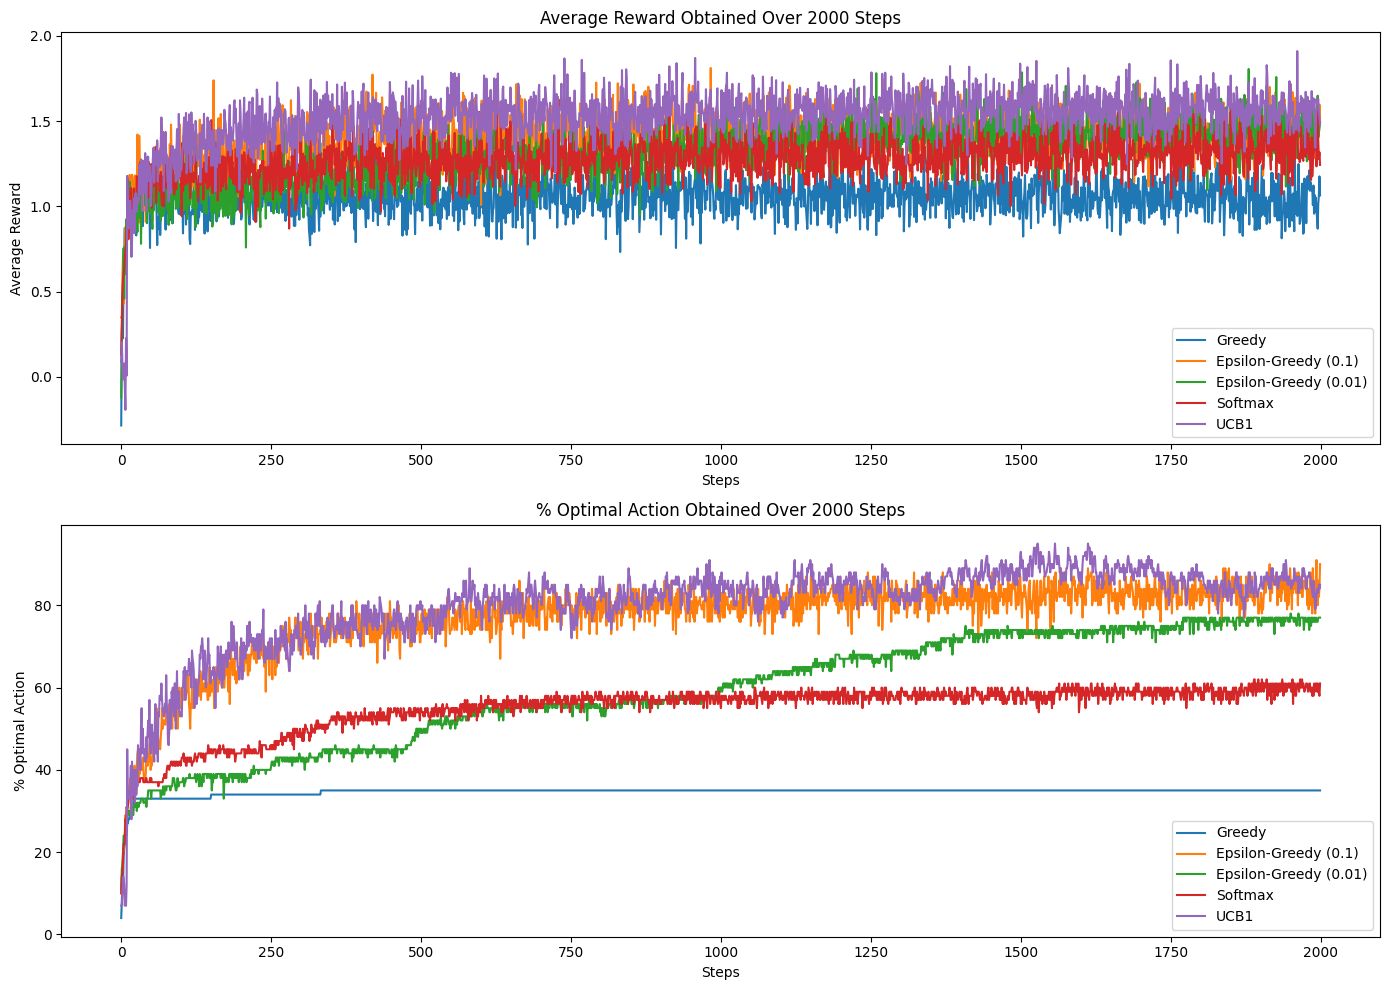

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, k):
        self.k = k
        self.q_true = np.random.randn(k)
        self.best_action = np.argmax(self.q_true)

    def step(self, action):
        return np.random.randn() + self.q_true[action]


def greedy(Q, N):
    return np.argmax(Q)

def epsilon_greedy(Q, N, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(Q))
    else:
        return np.argmax(Q)

def softmax(Q, N, temperature=0.1):
    softmax_prob = np.exp(Q / temperature) / np.sum(np.exp(Q / temperature))
    return np.random.choice(len(Q), p=softmax_prob)

def ucb(Q, N, c=2):
    return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))

def simulate_bandit(bandit, algorithm, num_steps, params={}):
    k = bandit.k
    Q = np.zeros(k)
    N = np.zeros(k)

    rewards = np.zeros(num_steps)
    optimal_actions = np.zeros(num_steps)

    for step in range(num_steps):
        action = algorithm(Q, N, **params)
        reward = bandit.step(action)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]

        rewards[step] = reward
        optimal_actions[step] = 1 if action == bandit.best_action else 0

    return rewards, optimal_actions

def plot_results(algorithms, rewards, optimal_actions):
    plt.figure(figsize=(14, 10))

    # Plot average reward obtained over 2000 steps
    plt.subplot(2, 1, 1)
    for algorithm, reward in zip(algorithms, rewards):
        plt.plot(reward, label=algorithm)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward Obtained Over 2000 Steps')
    plt.legend()

    # Plot percentage of optimal action obtained over 2000 steps
    plt.subplot(2, 1, 2)
    for algorithm, optimal_action in zip(algorithms, optimal_actions):
        plt.plot(optimal_action * 100, label=algorithm)
    plt.xlabel('Steps')
    plt.ylabel('% Optimal Action')
    plt.title('% Optimal Action Obtained Over 2000 Steps')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    num_arms = 10
    num_steps = 2000
    num_runs = 100

    algorithms = ['Greedy', 'Epsilon-Greedy (0.1)', 'Epsilon-Greedy (0.01)', 'Softmax', 'UCB1']
    algorithm_functions = [greedy, epsilon_greedy, epsilon_greedy, softmax, ucb]
    algorithm_params = [None, {'epsilon': 0.1}, {'epsilon': 0.01}, {'temperature': 0.1}, None]

    all_rewards = []
    all_optimal_actions = []

    for algorithm, param in zip(algorithm_functions, algorithm_params):
        avg_rewards = np.zeros(num_steps)
        avg_optimal_actions = np.zeros(num_steps)

        for _ in range(num_runs):
            bandit = Bandit(num_arms)
            rewards, optimal_actions = simulate_bandit(bandit, algorithm, num_steps, params=param if param is not None else {})
            avg_rewards += rewards
            avg_optimal_actions += optimal_actions

        avg_rewards /= num_runs
        avg_optimal_actions /= num_runs

        all_rewards.append(avg_rewards)
        all_optimal_actions.append(avg_optimal_actions)

    plot_results(algorithms, all_rewards, all_optimal_actions)


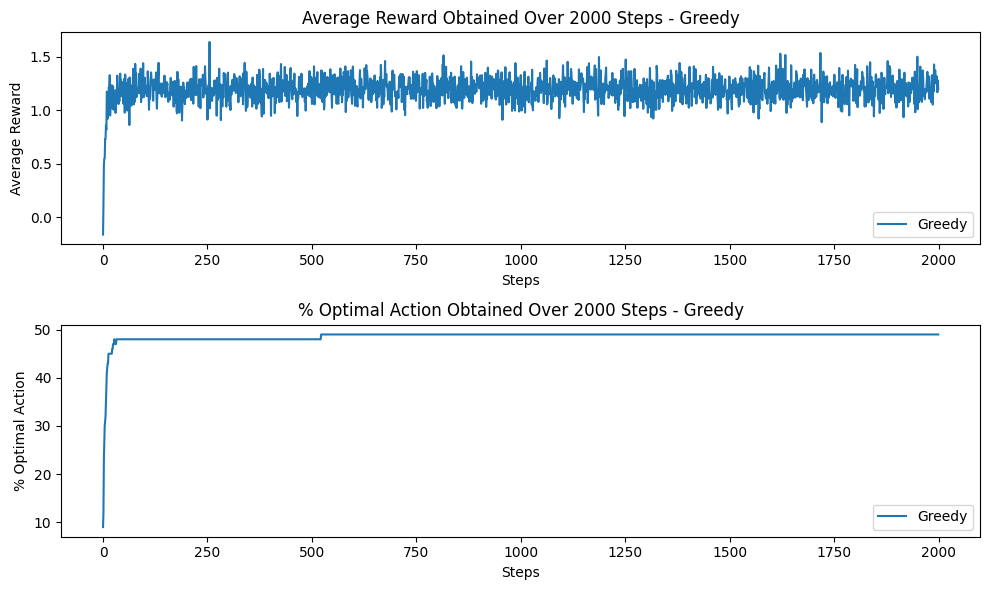

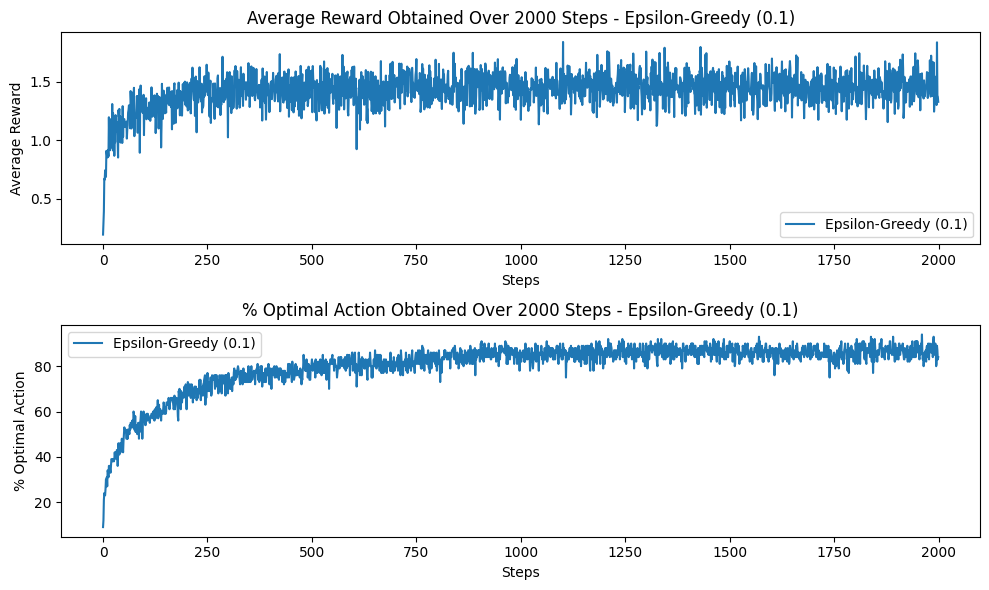

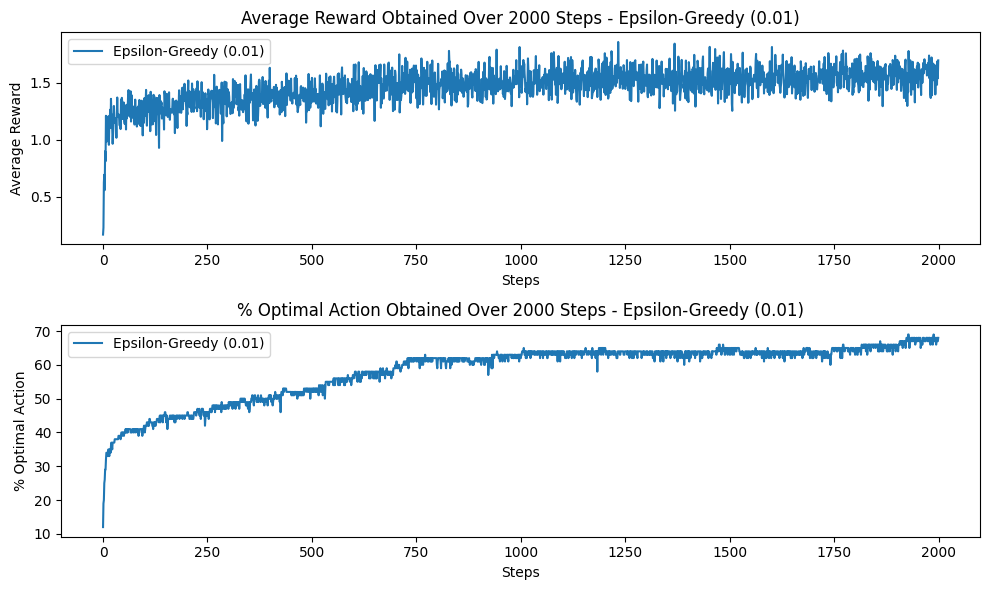

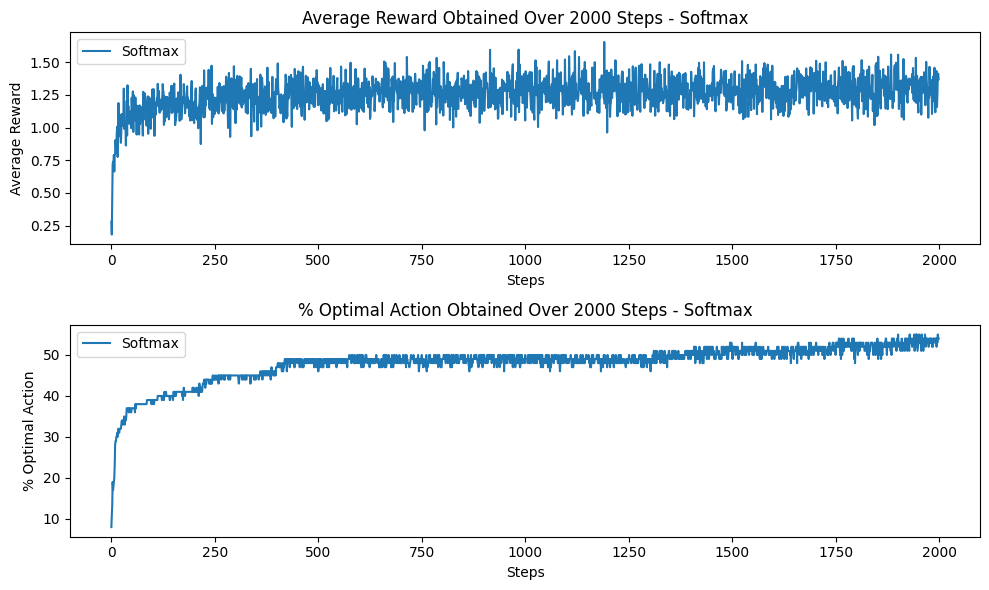

<ipython-input-5-fda25b833642>:28: RuntimeWarning: divide by zero encountered in log
  return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))
<ipython-input-5-fda25b833642>:28: RuntimeWarning: invalid value encountered in sqrt
  return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))
<ipython-input-5-fda25b833642>:28: RuntimeWarning: invalid value encountered in divide
  return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))
<ipython-input-5-fda25b833642>:28: RuntimeWarning: divide by zero encountered in divide
  return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))


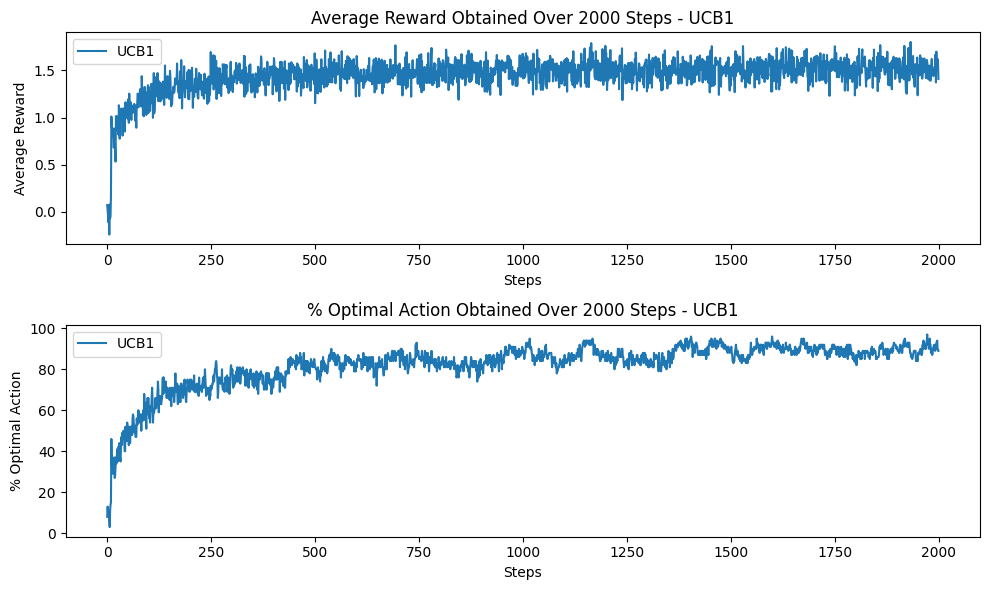

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, k):
        self.k = k
        self.q_true = np.random.randn(k)
        self.best_action = np.argmax(self.q_true)

    def step(self, action):
        return np.random.randn() + self.q_true[action]


def greedy(Q, N):
    return np.argmax(Q)

def epsilon_greedy(Q, N, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(Q))
    else:
        return np.argmax(Q)

def softmax(Q, N, temperature=0.1):
    softmax_prob = np.exp(Q / temperature) / np.sum(np.exp(Q / temperature))
    return np.random.choice(len(Q), p=softmax_prob)

def ucb(Q, N, c=2):
    return np.argmax(Q + c * np.sqrt(np.log(np.sum(N)) / N))

def simulate_bandit(bandit, algorithm, num_steps, params={}):
    k = bandit.k
    Q = np.zeros(k)
    N = np.zeros(k)

    rewards = np.zeros(num_steps)
    optimal_actions = np.zeros(num_steps)

    for step in range(num_steps):
        action = algorithm(Q, N, **params)
        reward = bandit.step(action)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]

        rewards[step] = reward
        optimal_actions[step] = 1 if action == bandit.best_action else 0

    return rewards, optimal_actions

def plot_results(algorithm, rewards, optimal_actions):
    plt.figure(figsize=(10, 6))

    # Plot average reward obtained over 2000 steps
    plt.subplot(2, 1, 1)
    plt.plot(rewards, label=algorithm)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title(f'Average Reward Obtained Over 2000 Steps - {algorithm}')
    plt.legend()

    # Plot percentage of optimal action obtained over 2000 steps
    plt.subplot(2, 1, 2)
    plt.plot(optimal_actions * 100, label=algorithm)
    plt.xlabel('Steps')
    plt.ylabel('% Optimal Action')
    plt.title(f'% Optimal Action Obtained Over 2000 Steps - {algorithm}')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    num_arms = 10
    num_steps = 2000
    num_runs = 100

    algorithms = ['Greedy', 'Epsilon-Greedy (0.1)', 'Epsilon-Greedy (0.01)', 'Softmax', 'UCB1']
    algorithm_functions = [greedy, epsilon_greedy, epsilon_greedy, softmax, ucb]
    algorithm_params = [None, {'epsilon': 0.1}, {'epsilon': 0.01}, {'temperature': 0.1}, None]

    for algorithm, function, params in zip(algorithms, algorithm_functions, algorithm_params):
        all_rewards = []
        all_optimal_actions = []

        for _ in range(num_runs):
            bandit = Bandit(num_arms)
            rewards, optimal_actions = simulate_bandit(bandit, function, num_steps, params=params if params is not None else {})
            all_rewards.append(rewards)
            all_optimal_actions.append(optimal_actions)

        avg_rewards = np.mean(all_rewards, axis=0)
        avg_optimal_actions = np.mean(all_optimal_actions, axis=0)

        plot_results(algorithm, avg_rewards, avg_optimal_actions)
